# IR flag incidence mission trend for guide and acq stars

This notebook creates plots of the mission trend of the fractional incidence of
the ionizing radiation flag (IR) being set for faint (10.3 - 10.6 mag) stars.  

- For guide stars this value is derived as the mean over 6-month bins of 
  the fractional incidence within each slot per observation.
- For acquisition stars this is the 6-month mean of the rate of IR being set for the
  single readout which is used by the OBC for star identification.  This is the readout
  where a star can fail OBC ID if the IR flag is being set (and it is being noticed).
  
As of 2018-May the peak incidence is around 4% for 10.3 to 10.6 mag stars.

In [1]:
from mica.stats import guide_stats, acq_stats
from astropy.table import Table
import matplotlib.pyplot as plt
from Chandra.Time import DateTime
%matplotlib inline

In [2]:
dat = guide_stats.get_stats()

In [3]:
dat = Table(dat)

In [4]:
', '.join(dat.colnames)

'obsid, obi, kalman_tstart, npnt_tstop, kalman_datestart, npnt_datestop, revision, slot, idx, type, yang, zang, sz, mag, n_samples, n_track, f_track, f_racq, f_srch, f_none, n_kalman, no_track, f_within_0.3, f_within_1, f_within_3, f_within_5, f_outside_5, f_obc_bad, f_common_col, f_quad_bound, f_sat_pix, f_def_pix, f_ion_rad, f_mult_star, aoacmag_min, aoacmag_mean, aoacmag_max, aoacmag_std, aoacyan_mean, aoaczan_mean, dy_min, dy_mean, dy_std, dy_max, dz_min, dz_mean, dz_std, dz_max, dr_min, dr_mean, dr_std, dr_5th, dr_95th, dr_max, n_track_interv, n_long_track_interv, n_long_no_track_interv, n_racq_interv, n_srch_interv, agasc_id, color, ra, dec, epoch, pm_ra, pm_dec, var, pos_err, mag_aca, mag_err, mag_band, pos_catid, aspq1, aspq2, aspq3, acqq1, acqq2, acqq4, n100_warm_frac, tccd_mean, tccd_max, known_bad, bad_comment'

In [5]:
d = dat  # for filtering only
mag0, mag1 = 10.3, 10.6
ok = ((d['mag_aca'] > mag0) &
      (d['mag_aca'] <= mag1) &
      (d['f_track'] >= 0.95) &
      (d['f_within_5'] > 0.95)
     )
dok = dat[ok]

In [6]:
len(dok)

1914

In [7]:
dok['qbin'] = np.trunc((dok['kalman_tstart'] - DateTime().secs) / (86400 * 365 / 2))
dok['year'] = DateTime(dok['kalman_tstart']).frac_year

In [8]:
dg = dok.group_by('qbin')
dga = dg.groups.aggregate(np.mean)

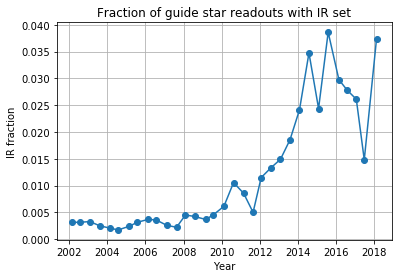

In [9]:
plt.plot(dga['year'], dga['f_ion_rad'], '-o')
plt.xlabel('Year')
plt.ylabel('IR fraction')
plt.title('Fraction of guide star readouts with IR set')
plt.grid();

In [10]:
adat = Table(acq_stats.get_stats())

In [11]:
mag0, mag1 = 10.3, 10.6
ok = ((adat['mag_aca'] > mag0) & (adat['mag_aca'] <= mag1)
       & (adat['img_func'] == 'star'))
adok = adat[ok]

In [12]:
adok['qbin'] = np.trunc((adok['guide_tstart'] - DateTime().secs) / (86400 * 365 / 2))
adok['year'] = DateTime(adok['guide_tstart']).frac_year

In [13]:
adg = adok.group_by('qbin')
adga = adg.groups.aggregate(np.mean)

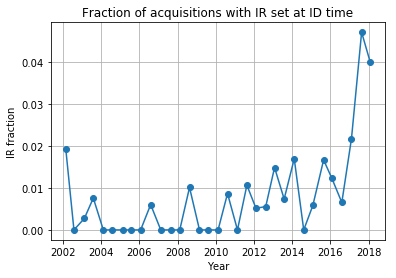

In [14]:
plt.plot(adga['year'], adga['ion_rad'], '-o')
plt.xlabel('Year')
plt.ylabel('IR fraction')
plt.title('Fraction of acquisitions with IR set at ID time')
plt.grid();